In [1]:
username = "Alex"
env = "integrate"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\")
include(pathtorepo * "dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


rate_jac (generic function with 1 method)

In [2]:
using JLD2, CairoMakie, GLMakie

In [3]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\Сопоставление с матконт\\файлы matlab")
I0_hom = load("I0_hom_hom.jld")["data"]
u0_hom = load("U0_hom_hom.jld")["data"]
I0_hom = I0_hom[:]
u0_hom = u0_hom[:]

I0_hom_st = load("I0_hom_stump.jld")["data"]
u0_hom_st = load("U0_hom_stump.jld")["data"]
I0_hom_st = I0_hom_st[:]
u0_hom_st = u0_hom_st[:]

I0_Fold = load("I0_Fold.jld")["data"]
U0_Fold = load("U0_Fold.jld")["data"]
I0_Fold = I0_Fold[:]
U0_Fold = U0_Fold[:]

I0_hom_bt = load("I0_hom_bt.jld")["data"]
U0_hom_bt = load("U0_hom_bt.jld")["data"]
I0_hom_bt = I0_hom_bt[:]
U0_hom_bt = U0_hom_bt[:];

index_start_hom_bt = 1; index_end_hom_bt = 8000

8000

In [4]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\bifurcationkit\\")

hp_codim2_1 = load("hp_codim2_1.jld2")
hp_codim2_1I0 = hp_codim2_1["I0"]
hp_codim2_1U0 = hp_codim2_1["U0"]

sn_codim2_1 = load("sn_codim2_1.jld2")
sn_codim2_1I0 = sn_codim2_1["I0"]
sn_codim2_1U0 = sn_codim2_1["U0"];

In [199]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\")
len = 350
map_dim = " $(len)x$(len) "
name = " tau_D article2 space with chaos and hom"
format = ".jld2"
namefile_LSE = "LSE" * map_dim * name * format
namefile_u0s = "u0s" * map_dim * name * format

Λs = load(namefile_LSE)
Λs = Λs["Λs"]
u0s = load(namefile_u0s)
u0s = u0s["u0s"]

I0range = range( -1.58, -1.78, length = len );
U0range = range(0.3, 0.264, length = len);

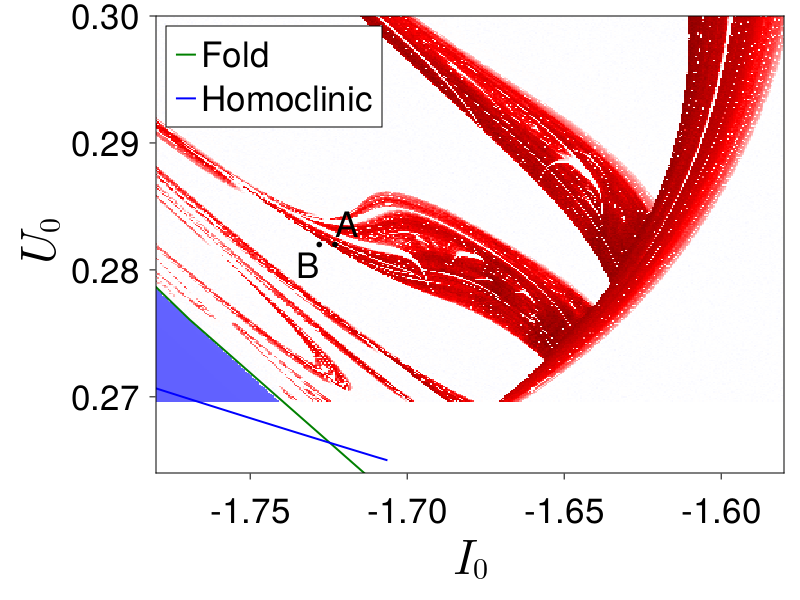

In [200]:
index = 1
absmax = maximum(abs.(Λs[:, :, index]))

mn, mx =  -absmax, absmax

CairoMakie.activate!()
f = Figure()
ticksize = 35
tickpad = 10.0
textsize = 25

mksize = 12

ax = Axis(f[1, 1], xlabel = L"I_0",ylabel = L"U_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)

hm = heatmap!(ax, I0range, U0range, Λs[:, :, index],
colormap = :seismic, colorrange = (mn, mx))

lines!(ax, sn_codim2_1I0, sn_codim2_1U0, label = "Fold", linewidth = 2.0, color = :green)

lines!(ax, I0_hom, u0_hom, label = "Homoclinic", color = :blue, linewidth = 2.0)
lines!(ax, I0_hom_bt[index_start_hom_bt:index_end_hom_bt], U0_hom_bt[index_start_hom_bt:index_end_hom_bt], color = :blue)

scatter!(ax, -1.1182463005483, 0.161724273501619, markersize = mksize, color = :black)
text!(ax, -1.1182463005483, 0.161724273501619, text = "cusp", fontsize = textsize)

scatter!(ax, -1.30295711421099, 0.179884505801528, markersize = mksize, color = :black)
text!(ax, -1.30295711421099, 0.179884505801528, text = "BT", fontsize = textsize)

scatter!(ax, -1.71286533418216, 0.221636390745317, markersize = mksize, color = :black)
text!(ax, -1.71286533418216, 0.221636390745317, text = "GH", fontsize = textsize)

#scatter!(ax, -1.3311265433046, 0.182481512082655, label = "ZH", markersize = 8, color = :purple)


scatter!(ax, −1.723, 0.282, markersize = 8, color = :black)
text!(ax,  −1.723, 0.282, text = "A", fontsize = 35)
scatter!(ax, -1.728, 0.282, markersize = 8, color = :black)
text!(ax, -1.728, 0.282, text = "B", fontsize = 35, align = (:right, :top))

ylims!(0.264, 0.3)
xlims!(-1.78, -1.58)

axislegend(ax, position = :lt, labelsize = 35)

display(f);

In [89]:
GLMakie.activate!()
display(GLMakie.Screen(), f);

In [91]:
pathtosave = "C:\\Users\\Alex\\Desktop\\"
filename = "\\test.eps"
fullpath = pathtosave * filename 
save(fullpath, f)

CairoMakie.Screen{EPS}
